# Session - 29(Machine Learning - 9)

In [ ]:
'''
In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and
compressed image and look for quality difference.
The raw image is available in spicy.misc package with the name face.

Hint:

import numpy as np
from sklearn import cluster, datasets
from scipy import misc
'''

## Load Python Modules

In [1]:
# For Dataframe and other data operations
import pandas as pd
# For Numerical opeartions
import numpy as np
# For Statistical and Scientific analysis
import scipy as sp
# For Pictorial /graphical representation
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Python modules for Machine Learning
# For Cluster and other ML algorithm related in sklearn
from sklearn import cluster, datasets
# For Misclleneous data
from scipy import misc
# For Iamge Processing in python
from skimage.measure import compare_ssim as ssim

## Load DataSet / Image

In [3]:
# Laod racoon Image 

racoon_image = misc.face(gray=True)
racoon_image

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

## Data Visualisation / Data Exploration

Original Image


<Figure size 432x288 with 0 Axes>

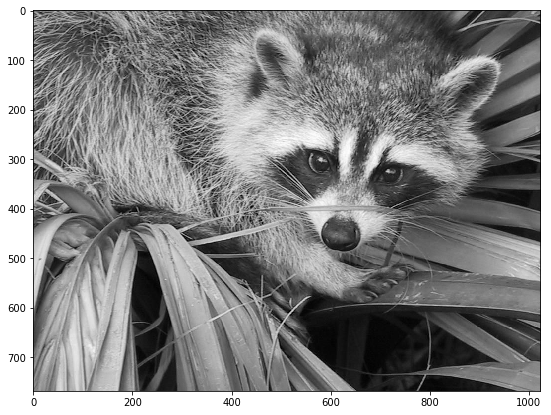

In [4]:
# Show Image 
print("Original Image")
plt.gray()
plt.figure(figsize=(10,7))
plt.imshow(racoon_image)
plt.show()

In [5]:
# Image Shape 
print( "Shape Of Image")
print( racoon_image.shape)

Shape Of Image
(768, 1024)


In [6]:
# Image Datatype
print("Data type for Image :", racoon_image.dtype)

Data type for Image : uint8


In [7]:
# Image Dimension
print("Dimension of Image: ",racoon_image.ndim )

Dimension of Image:  2


## K-Means Clustering for Image Compression

In [8]:
# No. Of Clusters
no_of_clusters = 5

# Reshaping of image ( Converting iamge in to 1-D array)
racoon_image_data=racoon_image.reshape(racoon_image.shape[0]*racoon_image.shape[1],1)
racoon_image_data

array([[114],
       [130],
       [145],
       ...,
       [142],
       [141],
       [140]], dtype=uint8)

In [9]:
# Apply parameters into K-means clustering

from sklearn.cluster import KMeans

# Apply paramters to KMeans Cluster
K_means_Cluster = KMeans (n_clusters= no_of_clusters  , algorithm='auto' , n_init= 15 , max_iter= 300 , n_jobs= 5 , init='k-means++' ,random_state=10)

# Fit data into Cluster

K_means_Cluster.fit(X=racoon_image_data )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=15, n_jobs=5, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [10]:
# Getting Cluster Number

k_Centers =K_means_Cluster.cluster_centers_
print("K-means cluster center")
k_Centers

K-means cluster center


array([[112.58331688],
       [ 27.11166441],
       [192.8878986 ],
       [ 73.91549783],
       [150.78205092]])

In [11]:
# Getting Cluster labels

k_labels =K_means_Cluster.labels_
print("K-means cluster labels")
k_labels

K-means cluster labels


array([0, 0, 4, ..., 4, 4, 4])

In [12]:
# Creting an array from Cluster Centers and Cluster Lables

compresed_racoon_image = np.choose(k_labels , k_Centers)
compresed_racoon_image

array([112.58331688, 112.58331688, 150.78205092, ..., 150.78205092,
       150.78205092, 150.78205092])

In [13]:
# Length of Compressed Image

print("Length of Compreesed image :",len(compresed_racoon_image))

Length of Compreesed image : 786432


In [14]:
# Convert Compreed image into orginal Image size

compresed_racoon_image.shape = racoon_image.shape # applying original image shape to compressed image
print("Shape of Compreesed Image :",compresed_racoon_image.shape)
print("Dimension of Compreesed Image :",compresed_racoon_image.ndim)

Shape of Compreesed Image : (768, 1024)
Dimension of Compreesed Image : 2


 Compressed Image


<Figure size 432x288 with 0 Axes>

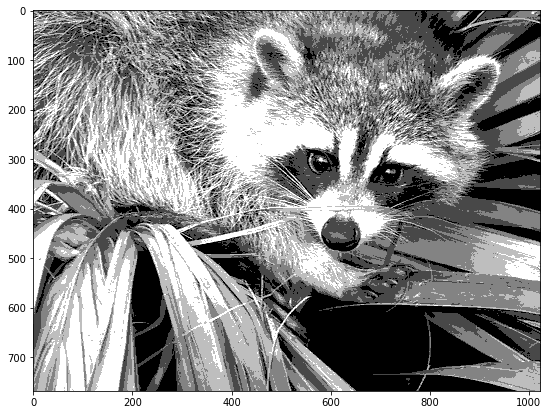

In [15]:
# Visualising Compreesed image

print(" Compressed Image")
plt.gray()
plt.figure(figsize=(10,7))
plt.imshow(compresed_racoon_image)
plt.show()

## Compare Images

 Comparison of original and compressed Image


<Figure size 432x288 with 0 Axes>

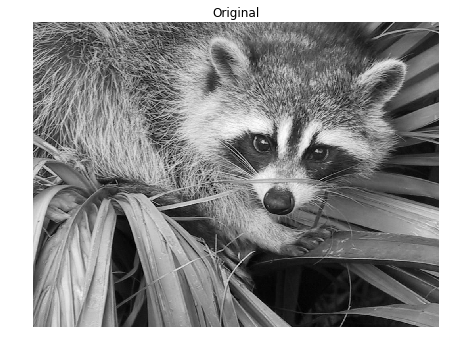

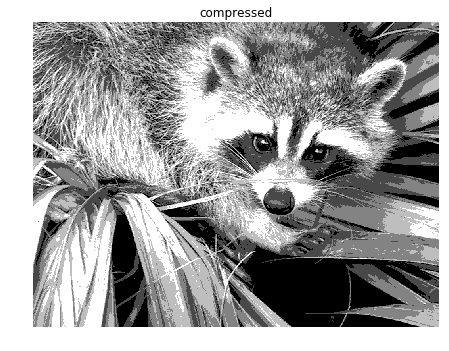

In [16]:
# Load Images

# Intialize the figure
fig = plt.figure("Images")
images = ("Original", racoon_image), ("compressed", compresed_racoon_image)

# Looping Images to compare

print(" Comparison of original and compressed Image")

for ( i , (name,image)) in enumerate(images):
    #Show images
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 2, i + 1)
    ax.set_title(name)    
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
    plt.show()

## Compare similarity between Images

In [17]:
#The 'Mean Squared Error' between the two images is the sum of the squared difference between the two images;

def mse(image, com_image):
    '''This Function returns error value based upon orginal and compressed image'''
    # 'Mean Squared Error', NOTE: the two images must have the same dimension
    error = np.sum((image.astype("float") - com_image.astype("float")) ** 2)
    error /= float(image.shape[0] * com_image.shape[1])
    # return the MSE, the lower the error, the more "similar" the two images are
    return error


def compare_image(image, com_image, title):
    '''This Function returns comparison of images based upon orginal and compressed image'''
    # compute the MSE and structural similarity index for the images
    m = mse(image, com_image)
    s = ssim(image.astype('float'), com_image.astype('float'))
    # setup the figur
    fig = plt.figure(title , figsize=(10,7))
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    ax.set_title("Original Image")
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    ax.set_title("Compressed Image")
    plt.imshow(com_image, cmap = plt.cm.gray)
    plt.axis("off")

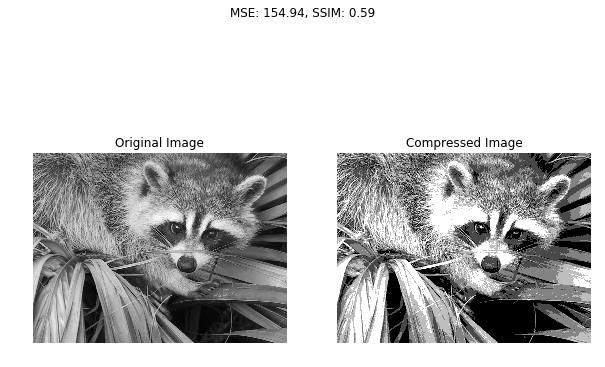

In [18]:
# Comparing Images , apply values on function
compare_image(racoon_image, compresed_racoon_image, "Comparison of Original and Compressed racoon grey scale image")

In [19]:
print("Mean Squared Error :",mse(racoon_image , compresed_racoon_image))

Mean Squared Error : 154.9358542369462


In [20]:
print("structural similarity(SSIM) :",ssim(racoon_image , compresed_racoon_image))

structural similarity(SSIM) : 0.7839151112613316
